# Self Organizing Map

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('winequality-red.csv', sep=';')
X = dataset.iloc[:, 0:-2].values
y = dataset.iloc[:,-1].values

# Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM

In [9]:
from minisom import MiniSom
som = MiniSom(x = 40, y = 40, input_len = 10, sigma = 0.5, learning_rate = 0.25)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

# Visualizing the results

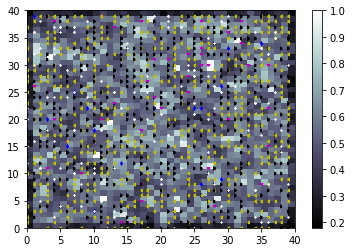

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', '.', ',', 'v', '<', '>', '*', 'd', 'D']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'm']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0],
         w[1],
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 1,
         markeredgewidth = 2)
show()